In [49]:
#import custom classes from decision tree
from decisiontree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Classification Tree from Scratch

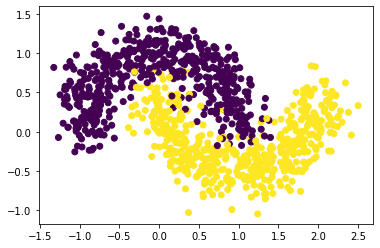

In [50]:
N= 1000
X,Y = make_moons(N, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [51]:
Y = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= 0.4091808396198679 ? 0.2134833392069732
 left:X_0 <= -0.45174745897636936 ? 0.1445117098293387
  left:0.0
  right:X_1 <= -0.09137045399119352 ? 0.031593894202119194
    left:X_1 <= -0.17753084735619573 ? 0.003758857117686195
        left:1.0
        right:X_1 <= -0.17510611921328467 ? 0.10463238724030298
                left:0.0
                right:X_0 <= 0.6119193032574783 ? 0.007728894173602813
                                left:1.0
                                right:1.0
    right:X_0 <= 1.400146409570639 ? 0.09164559821374274
        left:X_0 <= 0.5520935083371692 ? 0.3811218154981341
                left:X_0 <= 0.2721079790297473 ? 0.010822060353798006
                                left:1.0
                                right:1.0
                right:X_1 <= -0.03217677965504917 ? 0.049519890260631014
                                left:0.0
                                right:0.0
        right:1.0
 right:X_0 <= 1.139963334462802 ? 0.08816272163507738
  left:X_1

In [52]:
#test
Y_pred = classifier.predict(X_test) 
print(f"Our implementation of tree from scratch reaches an accuracy of {accuracy_score(Y_test, Y_pred)*100}%")

Our implementation of tree from scratch reaches an accuracy of 96.5%


### Comparison with sklearn

In [53]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeClassifier as dtc

In [54]:
tree_sklearn = dtc(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has an accuracy of {accuracy_score(Y_test, y_hat)*100}%")

With the same parameters, sklearn implementation has an accuracy of 95.5%


# Regression Tree from Scratch

In [55]:
data = load_diabetes()
x = data.data
y = data.target
y = y.reshape(-1,1)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [57]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_2 <= 0.00888341489852436 ? 1750.350965248149
 left:X_8 <= -0.0109044358473771 ? 845.2897357501961
  left:X_5 <= 0.108914381123697 ? 197.0922265602237
    left:X_2 <= -0.0105172024313319 ? 88.3194221759502
        left:X_6 <= 0.0228686348215404 ? 72.23103180680278
                left:X_8 <= -0.0891368600793477 ? 105.38398813307936
                                left:78.0
                                right:71.0
                right:X_3 <= -0.0400993174922969 ? 108.31950268060154
                                left:59.0
                                right:72.0
        right:X_8 <= -0.0236445575721341 ? 457.30235623661224
                left:X_5 <= 0.0108989125835731 ? 82.84230055658628
                                left:31.0
                                right:81.0
                right:X_0 <= -0.0527375548420648 ? 1494.222222222222
                                left:59.0
                                right:155.0
    right:253.0
  right:X_6 <= -0.0249926566315915 ? 509

In [58]:
y_hat = regressor.predict(X_test)
print(f"Our implementation of tree from scratch reaches a MSE of {mean_squared_error(Y_test, y_hat)}%")


Our implementation of tree from scratch reaches a MSE of 6210.191011235955%


### Comparison with sklearn

In [59]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeRegressor as dtr

In [60]:
tree_sklearn = dtr(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has a MSE of {mean_squared_error(Y_test, y_hat)}")

With the same parameters, sklearn implementation has a MSE of 4775.995002408541
